## ABSTRACT

### Resumen

El dataset analizado corresponde a una serie de imágenes, correspondientes a distintos artículos de vestimenta. Cabe destacar que cada imágen viene etiquetada de acuerdo al tipo de árticulo. Las etiquetas son numéricas, en el rango [0, 1].

### Objetivo

El objetivo del presente análisis es diseñar la arquitectura de una red neuronal que pueda ser entrenada de manera eficiente y así crear un modelo de aprendiazaje profundo (Deep Learning) que logre reconocer y clasificar imágenes.

### Contexto Comercial

El proyecto es de índole académica, con posible aplicación en áreas desde marketing hasta seguridad.

In [67]:
# Librerías
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from statsmodels.stats.proportion import proportion_confint

In [68]:
# Cargar el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

chequeamos forma y distribución de la data

In [69]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [70]:
distribucion_train = pd.Series(y_train).value_counts(normalize=True)
print("Balance (train):")
print(distribucion_train.sort_index())

distribucion_test = pd.Series(y_test).value_counts(normalize=True)
print("Balance (test):")
print(distribucion_test.sort_index())

Balance (train):
0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
6    0.1
7    0.1
8    0.1
9    0.1
Name: proportion, dtype: float64
Balance (test):
0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
6    0.1
7    0.1
8    0.1
9    0.1
Name: proportion, dtype: float64


In [71]:
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0 255
0 255


In [72]:
# Normalizar data
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


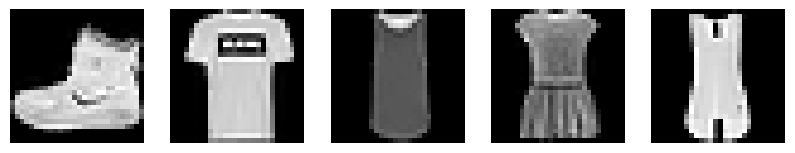

In [73]:
# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

### Ya teniendo claridad de la forma y distribución de la data, y habiendo normalizado, pasamos a diseñar la arquitectura de la red neuronal.

### La arquitectura de nuestra red será del tipo Convolusional (aplica distintos filtros para encontrar patrones en las imágenes) y Secuencial (procesa las capas en el orden diseñado, no al mismo tiempo).

In [74]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [75]:
# Se divide la data de entrenamiento para realizar validaciones más eficientes
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [76]:
# Se compila el modelo utilizando 'early stop' para prevenir sobreajuste

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 97s 61ms/step - accuracy: 0.7718 - loss: 0.6286 - val_accuracy: 0.8827 - val_loss: 0.3200
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 92s 61ms/step - accuracy: 0.8895 - loss: 0.3052 - val_accuracy: 0.9032 - val_loss: 0.2603
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 94s 63ms/step - accuracy: 0.9046 - loss: 0.2578 - val_accuracy: 0.9093 - val_loss: 0.2439
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 96s 64ms/step - accuracy: 0.9185 - loss: 0.2211 - val_accuracy: 0.9122 - val_loss: 0.2415
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 94s 62ms/step - accuracy: 0.9283 - loss: 0.1930 - val_accuracy: 0.9135 - val_loss: 0.2343


### A continuación graficamos comportamiento de las métricas, para verificar ajuste

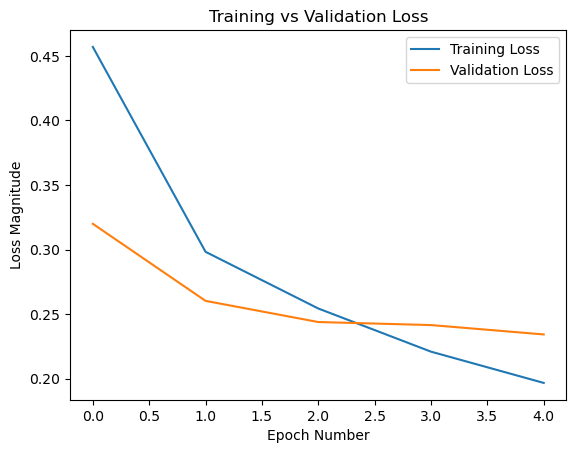

In [77]:
# Función de pérdida
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

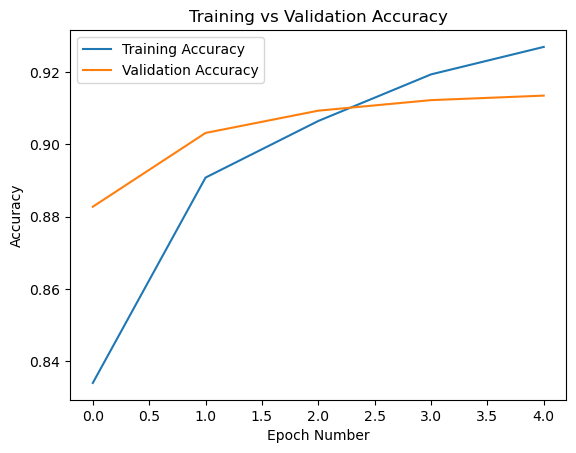

In [78]:
# Precisión
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

### Finalmente, evaluamos el modelo con la data de testeo y realizamos un intervalo de confianza para validar el resultado.

In [79]:
# Evaluación
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9079 - loss: 0.2618


In [80]:
# Intervalo de confianza
n = len(y_test)

ci_low, ci_upp = proportion_confint(count=accuracy * n, nobs=n, alpha=0.05, method='normal')

print(f"Intervalo de confianza (95%): [{ci_low:.4f}, {ci_upp:.4f}]")

Intervalo de confianza (95%): [0.9040, 0.9152]


### Conclusión

Se logró construir una red neuronal aritificial con una arquitectura eficiente, logrando llegar a un muy buen resultado, con un intervalo de confianza bastante acotado, y sin sobreajuste. Ahora el modelo debiese ser capaz de clasificar nuevas imágenes de manera correcta sin problemas.